In [1]:
import pandas as pd 
import numpy as np 

In [2]:

df = pd.read_csv("dataset/Admission_Predict.csv")
df.shape

(400, 9)

In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:

df.duplicated().sum()

0

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# we don't need serial No. so remove it.
df.drop(columns=["Serial No."],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# train test split
X = df.drop(columns=["Chance of Admit "]) 
y = df["Chance of Admit "]


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)



<br>
<br>

###  এখানে আমরা  min_max scaling ব্যবহার করবো । কারণ আমাদের minimum and maximum ভ্যালু জানা আছে ।  

<br>
<br>

In [8]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(X_train)

MinMaxScaler()

In [9]:
mms.data_max_

array([340.  , 120.  ,   5.  ,   5.  ,   5.  ,   9.91,   1.  ])

In [10]:
X_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,318.212500,107.887500,3.225000,3.506250,3.537500,8.649000,0.550000
std,12.263658,6.711022,1.272643,1.077661,1.051747,0.656092,0.500633
min,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000
25%,310.000000,103.750000,2.000000,2.500000,2.875000,8.170000,0.000000
50%,319.000000,107.000000,3.000000,3.500000,3.500000,8.665000,1.000000
75%,326.000000,113.000000,4.000000,4.500000,4.500000,9.110000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.910000,1.000000


In [11]:
X_train_sc = mms.fit_transform(X_train)
X_test_sc = mms.fit_transform(X_test)

In [12]:

X_train_sc


array([[0.26      , 0.46428571, 1.        , 1.        , 0.875     ,
        0.53505535, 0.        ],
       [0.22      , 0.42857143, 0.25      , 0.625     , 0.625     ,
        0.25461255, 1.        ],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.58302583, 0.        ],
       [0.36      , 0.39285714, 0.25      , 0.375     , 0.75      ,
        0.42804428, 1.        ],
       [0.5       , 0.42857143, 0.5       , 0.5       , 0.375     ,
        0.41697417, 0.        ],
       [0.88      , 1.        , 1.        , 0.75      , 1.        ,
        0.98523985, 1.        ],
       [1.        , 0.82142857, 1.        , 0.875     , 0.875     ,
        0.8302583 , 1.        ],
       [0.88      , 0.96428571, 1.        , 0.875     , 0.875     ,
        0.84132841, 1.        ],
       [0.52      , 0.21428571, 0.        , 0.125     , 0.25      ,
        0.08487085, 0.        ],
       [0.6       , 0.42857143, 0.5       , 0.625     , 0.875     ,
        0.42066421, 1. 

In [13]:

y_train


131    0.77
357    0.68
398    0.67
262    0.70
324    0.67
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 80, dtype: float64

---

# Architucture of our model (we are solving a regression problem)

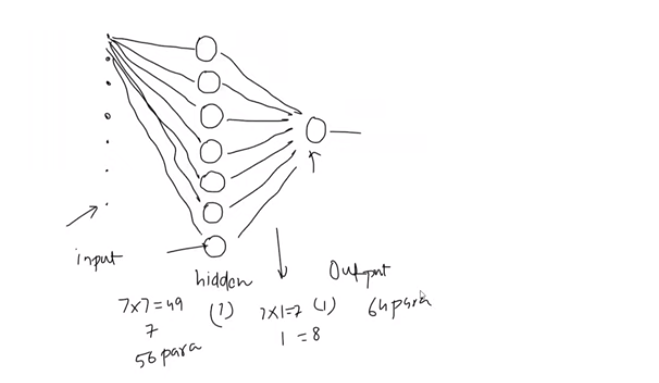

<br> 

---

In [14]:

import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense


2024-04-06 19:38:32.593551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:

model = Sequential()

# first hidden layer
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))


# output  
# linear because we are working with regression problem

model.add(Dense(1,activation='linear'))


2024-04-06 19:38:39.880721: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:

# see the summary of our model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [17]:

# compile the model:

model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])



In [18]:

# train the model

history = model.fit(X_train_sc,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
2/2 [==============================] - 2s 424ms/step - loss: 0.4065 - accuracy: 0.0000e+00 - val_loss: 0.3738 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 183ms/step - loss: 0.3888 - accuracy: 0.0000e+00 - val_loss: 0.3574 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 151ms/step - loss: 0.3722 - accuracy: 0.0000e+00 - val_loss: 0.3415 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 171ms/step - loss: 0.3556 - accuracy: 0.0000e+00 - val_loss: 0.3260 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 219ms/step - loss: 0.3394 - accuracy: 0.0000e+00 - val_loss: 0.3108 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 84ms/step - loss: 0.3233 - accuracy: 0.0000e+00 - val_loss: 0.2960 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 175ms/step - loss: 0.3080 - accuracy: 0.0000e+00 - va

<br>
<br>

In [19]:

y_pred = model.predict(X_test_sc)


10/10 [==============================] - 0s 4ms/step


<br>

`Regression problem  এর ক্ষেত্রে আমরা r2_score  ব্যবহার করি । `                              
<br>                        


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5862502067489487

In [21]:
import matplotlib.pyplot as plt

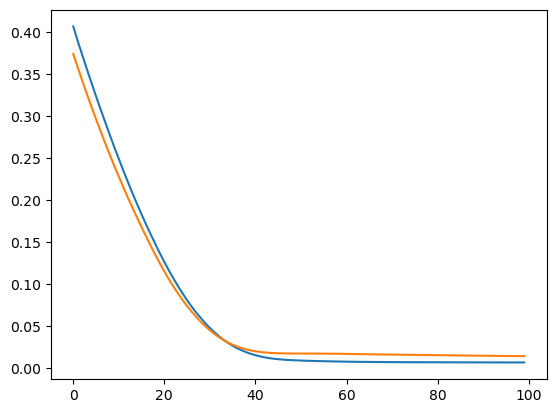

In [24]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


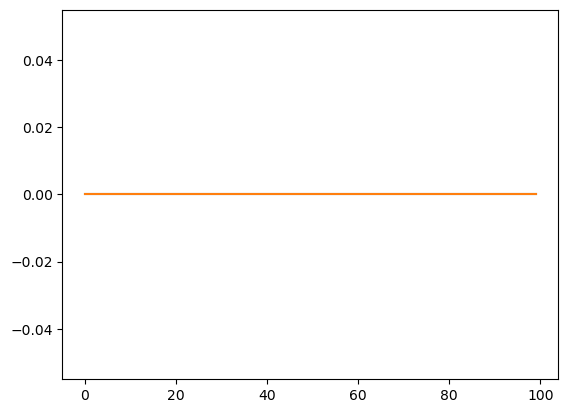

In [25]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
